## UK Gender Pay Gap


### Description:
Employers with 250 or more employees in UK had to publish and report specific figures about their gender pay gap. The gender pay gap is the difference between the average earnings of men and women, expressed relative to men’s earnings. For example, ‘women earn 15% less than men per hour’. 

The goal of this project is to identify predictive factors for determining the expected gender paygap. 


### Source:
Two sources of data will be used for the analysis. The first one is the paygap as reported by each company - https://www.kaggle.com/linavrgd/uk-pay-gap-data-2018. The second one is a list of UK industry codes (aka SIC codes), which will allow industry-based analysis - https://www.gov.uk/government/publications/standard-industrial-classification-of-economic-activities-sic. 



### Gov website:
For easier reference while exploring the data,  here is the govermental database where one can search results based on the company name -  https://gender-pay-gap.service.gov.uk/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all files 

# UK paygap data
gap = pd.read_csv('UK Gender Pay Gap Data_05_06.csv')

# SIC codes data
co_data = pd.read_csv('all_uk_data.csv')



/Users/Lina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
gap.sample(5)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline
4079,Hertfordshire Community N H S Trust,"Howard Court,\r\nTewin Road,\r\nAL7 1BW",NaN,"1,\r\n86210",14.1,1.0,-257.5,-109.5,0.5,0.1,...,93.0,5.6,94.4,9.6,90.4,https://www.hct.nhs.uk/about-us/equality-and-d...,NaN,1000 to 4999,Hertfordshire Community N H S Trust,False
10096,Wildern School,"Wildern School Wildern Lane,\r\nHedge End,\r\n...",07554117,"1,\r\n85310",6.5,11.4,0.0,0.0,0.0,0.0,...,68.0,33.0,67.0,33.0,67.0,http://www.wildern.hants.sch.uk/our-school/pol...,NaN,250 to 499,Wildern School,False
5146,Lewisham And Greenwich Nhs Trust,"Lewisham and Greenwich NHS Trust,\r\nWaterloo ...",NaN,"1,\r\n86210",20.5,12.3,22.8,25.5,6.8,0.9,...,82.1,15.2,84.8,31.8,68.2,NaN,NaN,"5000 to 19,999",Lewisham And Greenwich Nhs Trust,False
484,APPLE RETAIL UK LIMITED,"5th Floor 6 St Andrew Street,\r\nLondon,\r\nUn...",04996702,82990,-5.0,5.0,-20.0,16.0,91.0,87.0,...,28.0,79.0,21.0,71.0,29.0,https://www.apple.com/legal/more-resources/doc...,Peter Denwood (Director),1000 to 4999,APPLE RETAIL UK LIMITED,False
4052,HENDERSON ADMINISTRATION LIMITED,"201 Bishopsgate,\r\nLondon,\r\nUnited Kingdom,...",00290577,70100,36.9,32.7,80.9,64.0,92.8,87.5,...,48.0,74.0,26.0,81.0,19.0,https://www.snl.com/IRW/CustomPage/4147331/Ind...,Kathleen Reeves (Co-Head of HR),1000 to 4999,HENDERSON ADMINISTRATION LIMITED,False


In [4]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 23 columns):
EmployerName                 10332 non-null object
Address                      10332 non-null object
CompanyNumber                8993 non-null object
SicCodes                     9763 non-null object
DiffMeanHourlyPercent        10332 non-null float64
DiffMedianHourlyPercent      10332 non-null float64
DiffMeanBonusPercent         10332 non-null float64
DiffMedianBonusPercent       10332 non-null float64
MaleBonusPercent             10332 non-null float64
FemaleBonusPercent           10332 non-null float64
MaleLowerQuartile            10332 non-null float64
FemaleLowerQuartile          10332 non-null float64
MaleLowerMiddleQuartile      10332 non-null float64
FemaleLowerMiddleQuartile    10332 non-null float64
MaleUpperMiddleQuartile      10332 non-null float64
FemaleUpperMiddleQuartile    10332 non-null float64
MaleTopQuartile              10332 non-null float64
FemaleTopQuar

In [5]:
co_data.sample(5)

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4
1281742,1281742,ERICSON TECHNOLOGY LLP,OC316062,NaN,NaN,SUITE B 11 CHURCHILL COURT,58 STATION ROAD,NORTH HARROW,MIDDLESEX,NaN,HA2 7SA,Limited Liability Partnership,Active,United Kingdom,0,None Supplied,NaN,NaN,NaN
2176007,2176007,LANGTREE LIMITED,NI048736,NaN,NaN,LAGAN HOUSE,CLARENDON DOCK,BELFAST,NaN,NaN,BT1 3BG,Private Limited Company,Active,United Kingdom,2,41201 - Construction of commercial buildings,NaN,NaN,NaN
819242,819242,CLAIRE CRONIN DIGITAL LTD,10910283,NaN,NaN,93 WINDSOR ROAD,NaN,GILLINGHAM,NaN,UNITED KINGDOM,ME7 4QL,Private Limited Company,Active,United Kingdom,0,62020 - Information technology consultancy act...,"63110 - Data processing, hosting and related a...",NaN,NaN
2573473,2573473,MR SJ ROBINSON LTD,08168815,NaN,NaN,610 WESTCLIFFE APARTMENTS,1 SOUTH WHARF ROAD,LONDON,NaN,NaN,W2 1JB,Private Limited Company,Active,United Kingdom,0,82990 - Other business support service activit...,NaN,NaN,NaN
3991554,3991554,VILMANTAS LTD,11049833,NaN,NaN,5 GUN HILL PLACE,NaN,BASILDON,ESSEX,UNITED KINGDOM,SS16 5UX,Private Limited Company,Active,United Kingdom,0,49410 - Freight transport by road,NaN,NaN,NaN


In [6]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195230 entries, 0 to 4195229
Data columns (total 19 columns):
Unnamed: 0                    int64
CompanyName                   object
 CompanyNumber                object
RegAddress.CareOf             object
RegAddress.POBox              object
RegAddress.AddressLine1       object
 RegAddress.AddressLine2      object
RegAddress.PostTown           object
RegAddress.County             object
RegAddress.Country            object
RegAddress.PostCode           object
CompanyCategory               object
CompanyStatus                 object
CountryOfOrigin               object
Mortgages.NumMortSatisfied    int64
SICCode.SicText_1             object
SICCode.SicText_2             object
SICCode.SicText_3             object
SICCode.SicText_4             object
dtypes: int64(2), object(17)
memory usage: 608.1+ MB


In [7]:
# Remove spaces from beginning of column names of co_data df

co_data.columns = [c.replace(' ', '_') for c in co_data.columns]

co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195230 entries, 0 to 4195229
Data columns (total 19 columns):
Unnamed:_0                    int64
CompanyName                   object
_CompanyNumber                object
RegAddress.CareOf             object
RegAddress.POBox              object
RegAddress.AddressLine1       object
_RegAddress.AddressLine2      object
RegAddress.PostTown           object
RegAddress.County             object
RegAddress.Country            object
RegAddress.PostCode           object
CompanyCategory               object
CompanyStatus                 object
CountryOfOrigin               object
Mortgages.NumMortSatisfied    int64
SICCode.SicText_1             object
SICCode.SicText_2             object
SICCode.SicText_3             object
SICCode.SicText_4             object
dtypes: int64(2), object(17)
memory usage: 608.1+ MB


In [8]:
# Rename the column CompanyNumber

co_data.rename(columns={'_CompanyNumber': 'CompanyNumber'}, inplace=True)


In [9]:
# Join the two df's on CompanyNumber

gap_all = pd.merge(gap, co_data, how='left', on='CompanyNumber')

In [10]:
# Confirm the length of the the joined dataset

len(gap_all)

10332

In [11]:
gap_all.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,NaN,DT11 0PX,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,United Kingdom,2.0,85310 - General secondary education,NaN,NaN,NaN
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19, Smith's Place,\r\nLeith Walk,\r\nEdinburgh...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,NaN,EH6 8NU,Private Limited Company,Active,United Kingdom,11.0,47730 - Dispensing chemist in specialised stores,NaN,NaN,NaN
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,NaN,CF10 5BF,Private Limited Company,Active,United Kingdom,9.0,61900 - Other telecommunications activities,NaN,NaN,NaN
3,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,NaN,TA2 8LG,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,United Kingdom,0.0,93110 - Operation of sports facilities,NaN,NaN,NaN
4,1879 EVENTS MANAGEMENT LIMITED,"The Sunderland Stadium Of Light,,\r\nSunderlan...",07743495,"56210,\r\n70229",13.4,8.1,41.4,43.7,8.7,3.2,...,NaN,SR5 1SU,Private Limited Company,Active,United Kingdom,0.0,56210 - Event catering activities,70229 - Management consultancy activities othe...,NaN,NaN


In [12]:
gap_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10331
Data columns (total 41 columns):
EmployerName                  10332 non-null object
Address                       10332 non-null object
CompanyNumber                 8993 non-null object
SicCodes                      9763 non-null object
DiffMeanHourlyPercent         10332 non-null float64
DiffMedianHourlyPercent       10332 non-null float64
DiffMeanBonusPercent          10332 non-null float64
DiffMedianBonusPercent        10332 non-null float64
MaleBonusPercent              10332 non-null float64
FemaleBonusPercent            10332 non-null float64
MaleLowerQuartile             10332 non-null float64
FemaleLowerQuartile           10332 non-null float64
MaleLowerMiddleQuartile       10332 non-null float64
FemaleLowerMiddleQuartile     10332 non-null float64
MaleUpperMiddleQuartile       10332 non-null float64
FemaleUpperMiddleQuartile     10332 non-null float64
MaleTopQuartile               10332 non-null floa

In [13]:
# Define what columns we need

gap_col = ['EmployerName', 'DiffMedianHourlyPercent', 'DiffMedianBonusPercent', 
      'MaleBonusPercent', 'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleTopQuartile', 
      'FemaleTopQuartile', 'CompanyLinkToGPGInfo', 'EmployerSize', 'RegAddress.PostTown', 'CompanyCategory',
           'SICCode.SicText_1'] 


gap_all = gap_all[gap_col]



In [14]:
gap_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10331
Data columns (total 14 columns):
EmployerName               10332 non-null object
DiffMedianHourlyPercent    10332 non-null float64
DiffMedianBonusPercent     10332 non-null float64
MaleBonusPercent           10332 non-null float64
FemaleBonusPercent         10332 non-null float64
MaleLowerQuartile          10332 non-null float64
FemaleLowerQuartile        10332 non-null float64
MaleTopQuartile            10332 non-null float64
FemaleTopQuartile          10332 non-null float64
CompanyLinkToGPGInfo       7651 non-null object
EmployerSize               10332 non-null object
RegAddress.PostTown        8261 non-null object
CompanyCategory            8894 non-null object
SICCode.SicText_1          8894 non-null object
dtypes: float64(8), object(6)
memory usage: 1.2+ MB


### Data Dictionary

| Variable                  | Definition                                                             | Type    |
|:--------------------------|----------------------------------------------------------------------  |---------|
| EmployerName              | Company registration name                                              | String  |
| Address                   | Adress, city, zip code                                                 | String  |
| CompanyNumber             | Company registration number in the UK                                  | String  |
| SicCodes                  | Industry codes in the UK                                               | String  |
| DiffMeanHourlyPercent     | Percentage of mean difference in hourly payment                        | Float   |
| DiffMedianHourlyPercent   | Percentage of median difference in hourly payment                      | Float   |
| DiffMeanBonusPercent      | Percentage of mean difference in bonus                                 | Float   |
| DiffMedianBonusPercent    | Percentage of median difference in bonus                               | Float   |
| MaleBonusPercent          | Percentage of male employees earning bonus                             | Float   |
| FemaleBonusPercent        | Percentage of female employees earning bonus                           | Float   |
| MaleLowerQuartile         | Percentage of male employees in the lower payment quartile             | Float   |
| FemaleLowerQuartile       | Percentage of female employees in the lower payment quartile           | Float   |
| MaleLowerMiddleQuartile   | Percentage of male employees in the middle to lower payment quartile   | Float   |
| FemaleLowerMiddleQuartile | Percentage of female employees in the middle to lower payment quartile | Float   |
| MaleUpperMiddleQuartile   | Percentage of male employees in the Upper to middle payment quartile   | Float   |
| FemaleUpperMiddleQuartile | Percentage of female employees in the Upper to middle payment quartile | Float   |
| MaleTopQuartile           | Percentage of male employees in the top payment quartile               | Float   |
| FemaleTopQuartile         | Percentage of female employees in the top payment quartile             | Float   |
| CompanyLinkToGPGInfo      | Link to company's summary report                                       | String  |
| Employer Size   Center          | Mid-point of employer size range                                              | Integer  |
| RegAddress.PostTown               | The town where the company operates                                     | String 
| SICCode.SicText_1 | The primary industry code of the company | String |

In [15]:
gap_all.describe()

,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile
count,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000
mean,11.864160,-20.189111,35.607472,34.127216,46.393796,53.606204,60.833856,39.166144
std,15.714352,1413.543525,36.353912,36.068136,24.125626,24.125626,24.375394,24.375394
min,-164.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.000000,0.900000,0.375000,27.000000,35.600000,41.600000,17.175000
50%,9.400000,5.300000,20.000000,17.800000,44.400000,55.600000,62.700000,37.300000
75%,21.000000,38.000000,73.400000,70.400000,64.400000,73.000000,82.825000,58.400000
max,121.200000,5566.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


The negative minimum value of "DiffMedianHourlyPercent" & "DiffMedianBonusPercent" represent cases where women earn more than men. 

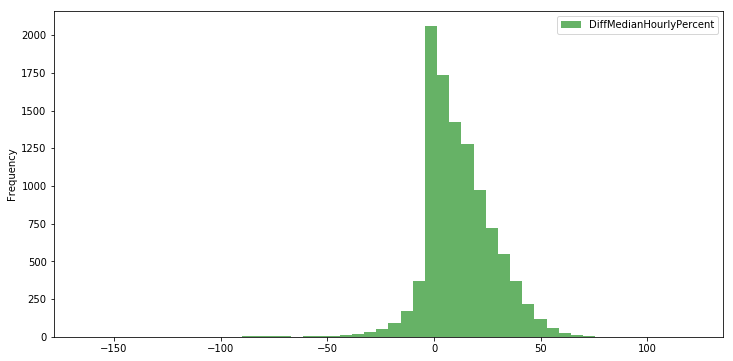

In [33]:
gap_all['DiffMedianHourlyPercent'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green')


Looking at this histogram, we observe that the distribution of the "DiffMedianHourlyPercent" is severely-skewed to the left. This means that in most the cases men have higher hourly payment compared to women

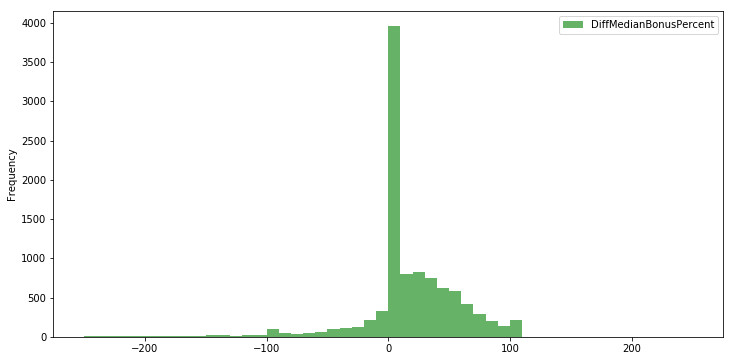

In [18]:
gap_all['DiffMedianBonusPercent'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green',
                                       range=(-250,250)) #setting up a range to ignore ourliers


Looking at this histogram, we can observe that the distribution of the "DiffMedianBonusPercent" is severely-skewed to the left. This means that in most the cases men are getting higher bonuses compared to women.

Interestingly enough, there are quite a few (valid) outliers on both sides of the spectrum. 

In [35]:
# 10 Companies with highest paygap in hourly payment favouring men
    
gap_all.nlargest(10, 'DiffMedianHourlyPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1,EmployerSizeCenter,SIC_SECTOR
7868,Shrewsbury Academies Trust,121.2,0.0,0.0,0.0,6.1,93.9,25.8,74.2,http://sat.coop,250 to 499,SHREWSBURY,"PRI/LBG/NSC (Private, Limited by guarantee, no...",85310 - General secondary education,350.0,Services
1160,BOUX AVENUE LIMITED,75.7,-100.0,0.0,81.0,0.0,100.0,9.0,91.0,http://www.bouxavenue.com,500 to 999,LONDON,Private Limited Company,47710 - Retail sale of clothing in specialised...,750.0,Utility Services
3449,FUSION PEOPLE LIMITED,73.3,89.0,19.0,15.0,49.6,50.4,82.2,17.8,https://fusionpeople.com/io/Gender-Pay-Gap-Rep...,500 to 999,"WHITELEY, FAREHAM",Private Limited Company,78200 - Temporary employment agency activities,750.0,Services
5481,MALLING HEALTH (UK) LIMITED,73.0,33.3,2.7,0.4,14.3,85.7,32.9,67.1,NaN,250 to 499,MANCHESTER,Private Limited Company,82990 - Other business support service activit...,350.0,Services
7522,Ryanair ltd,71.8,3.4,27.8,82.8,43.0,57.0,97.0,3.0,https://investor.ryanair.com/wp-content/upload...,1000 to 4999,NaN,NaN,NaN,3500.0,NaN
2117,CONNELLS SURVEY & VALUATION LIMITED,71.0,86.0,94.0,56.0,17.0,83.0,86.0,14.0,NaN,250 to 499,LEIGHTON BUZZARD,Private Limited Company,"74909 - Other professional, scientific and tec...",350.0,Services
10140,WIPAC LIMITED,68.5,18.4,9.3,2.8,61.6,38.4,93.1,6.9,http://www.wipac.com/,250 to 499,NaN,Private Limited Company,29320 - Manufacture of other parts and accesso...,350.0,Manufacturing
4925,Kirkland & Ellis International LLP,68.2,74.3,77.4,77.9,34.4,65.6,62.3,37.7,https://www.kirkland.com/sitecontent.cfm?conte...,250 to 499,NaN,NaN,NaN,350.0,NaN
8484,SWEATY BETTY LIMITED,68.1,72.5,75.0,85.0,0.0,100.0,4.0,96.0,http://www.sweatybetty.com/images/articles/swe...,500 to 999,LONDON,Private Limited Company,47710 - Retail sale of clothing in specialised...,750.0,Utility Services
2764,EAST LIFESTYLE LIMITED,67.5,-28.9,28.6,7.5,1.5,98.5,14.7,85.3,NaN,250 to 499,LONDON,Private Limited Company,47710 - Retail sale of clothing in specialised...,350.0,Utility Services


In [36]:
# 10 Companies with highest paygap in hourly payment favouring women
    
gap_all.nsmallest(10, 'DiffMedianHourlyPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1,EmployerSizeCenter,SIC_SECTOR
4390,INBRELLA LIMITED,-164.0,0.0,0.0,0.0,96.1,3.9,74.1,25.9,NaN,250 to 499,LUTON,Private Limited Company,69201 - Accounting and auditing activities,350.0,Financials
7136,RANDSTAD HR SOLUTIONS LIMITED,-103.6,-2.0,2.9,1.2,16.3,83.7,31.1,68.9,https://www.randstad.co.uk/about-us/about-rand...,1000 to 4999,LUTON,Private Limited Company,78200 - Temporary employment agency activities,3500.0,Services
6861,PLUS PAYROLL SERVICES LIMITED,-100.1,0.0,0.0,0.0,96.7,3.3,30.9,69.1,NaN,500 to 999,LUTON,Private Limited Company,78109 - Other activities of employment placeme...,750.0,Services
2282,CREST PLUS OPERATIONS LIMITED,-85.2,0.0,0.0,0.0,97.0,3.0,81.2,18.8,https://www.crestplus.com/pay-gap-report.pdf,1000 to 4999,CHESTER,Private Limited Company,"74909 - Other professional, scientific and tec...",3500.0,Services
6417,NWN MEDIA LIMITED,-85.2,10.0,2.2,2.2,53.5,46.5,64.0,36.0,NaN,1000 to 4999,HIGH WYCOMBE,Private Limited Company,18110 - Printing of newspapers,3500.0,not used
9841,WALLACE TRUST,-81.9,0.0,0.0,0.0,6.0,94.0,6.0,94.0,http://www.woodnewtontrust.com/,250 to 499,CORBY,"PRI/LBG/NSC (Private, Limited by guarantee, no...",85100 - Pre-primary education,350.0,Services
2683,Ducas Ltd,-81.3,0.0,0.0,0.0,82.1,17.9,26.8,73.2,NaN,250 to 499,TUNBRIDGE WELLS,Private Limited Company,82990 - Other business support service activit...,350.0,Services
10264,YELLOW DOT GROUP LIMITED,-80.6,-622.3,53.1,69.6,17.9,82.1,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,250 to 499,EASTLEIGH,Private Limited Company,70100 - Activities of head offices,350.0,Services
10265,YELLOW DOT LIMITED,-80.6,-622.3,53.1,69.6,17.9,82.1,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,Not Provided,RUSHDEN,Private Limited Company,85100 - Pre-primary education,NaN,Services
4985,L.E.A.D SERVICES LIMITED,-77.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,https://www.leadacademytrust.co.uk/useruploads...,Less than 250,NOTTINGHAM,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",85600 - Educational support services,125.0,Services


In [37]:
# 10 Companies with highest paygap in bonus payment favouring men
    
gap_all.nlargest(10, 'DiffMedianBonusPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1,EmployerSizeCenter,SIC_SECTOR
9058,THE REED BOARDALL GROUP LIMITED,1.8,5566.7,2.9,4.3,86.8,13.2,88.4,11.6,http://www.reedboardall.com/wp-content/uploads...,500 to 999,BOROUGHBRIDGE,Private Limited Company,64209 - Activities of other holding companies ...,750.0,Financials
1164,BOWDRAPER LIMITED,0.0,3848.2,0.7,0.5,25.0,75.0,24.0,76.0,https://bowdraper.co.uk,500 to 999,WARWICKSHIRE,Private Limited Company,81210 - General cleaning of buildings,750.0,Services
141,ACS RECRUITMENT SOLUTIONS LIMITED,0.0,3049.2,0.4,4.3,65.7,34.3,60.9,39.1,NaN,500 to 999,NORTHAMPTON,Private Limited Company,78109 - Other activities of employment placeme...,750.0,Services
9531,UNIQUE CATERING AND MANAGEMENT SERVICES LIMITED,44.2,568.0,6.2,2.2,17.9,82.1,57.7,42.3,https://www.uniquecatering.co.uk/,250 to 499,LEAMINGTON SPA,Private Limited Company,56290 - Other food services,350.0,Retail Trade
6995,PRISM UK MEDICAL LIMITED,15.7,336.0,9.0,4.0,45.0,55.0,75.0,25.0,NaN,250 to 499,WAKEFIELD,Private Limited Company,28220 - Manufacture of lifting and handling eq...,350.0,Manufacturing
7373,ROBINSON MEDICAL RECRUITMENT LIMITED,0.0,324.0,1.0,1.0,0.0,100.0,23.0,77.0,NaN,500 to 999,EDINBURGH,Private Limited Company,78200 - Temporary employment agency activities,750.0,Services
1594,CARE BY US LTD,1.0,312.0,4.0,96.0,18.0,82.0,10.0,90.0,NaN,500 to 999,BISHOP'S STORTFORD,Private Limited Company,88100 - Social work activities without accommo...,750.0,Services
9402,TRIFORDS LIMITED,13.6,285.7,68.1,9.2,70.4,29.6,91.8,8.2,NaN,250 to 499,SEVENOAKS,Private Limited Company,45200 - Maintenance and repair of motor vehicles,350.0,Utility Services
9666,VALE OF GLAMORGAN HOTEL LIMITED,9.3,281.0,26.0,48.0,40.8,59.2,60.0,40.0,https://www.valeresort.com/statutory-compliance/,250 to 499,PONTYCLUN,Private Limited Company,55100 - Hotels and similar accommodation,350.0,Retail Trade
3705,GP STRATEGIES LIMITED,58.8,272.2,49.3,44.2,22.5,77.5,68.8,31.2,https://www.gpstrategiesltd.com/about-us/gende...,500 to 999,ALTRINCHAM,Private Limited Company,85590 - Other education n.e.c.,750.0,Services


In [38]:
# 10 Companies with highest paygap in bonus payment favouring women
    
gap_all.nsmallest(10, 'DiffMedianBonusPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1,EmployerSizeCenter,SIC_SECTOR
6511,Optare Group Ltd,10.6,-120695.0,50.6,4.0,84.0,16.0,90.0,10.0,http://www.optare.com/,250 to 499,LEEDS,Private Limited Company,29100 - Manufacture of motor vehicles,350.0,Manufacturing
6664,PARSONS BAKERY LIMITED,9.0,-67400.0,0.0,19.0,8.0,92.0,27.0,73.0,NaN,250 to 499,SOUTH LIBERTY LANE,Private Limited Company,"47240 - Retail sale of bread, cakes, flour con...",350.0,Utility Services
6196,NHS Sheffield Clinical Commissioning Group,15.0,-31550.0,0.0,0.9,17.9,82.1,29.6,70.4,NaN,250 to 499,NaN,NaN,NaN,350.0,NaN
3896,Hallmark Cards PLC,32.5,-8408.0,41.7,12.9,13.3,86.7,34.8,65.2,http://www.hallmark.co.uk/about-us/,1000 to 4999,BRADFORD,Public Limited Company,58190 - Other publishing activities,3500.0,Retail Trade
443,Anglia Restaurants Ltd,-1.7,-8267.4,1.7,0.7,43.1,56.9,52.6,47.4,http://www.angliarestaurants.co.uk/PAGES/about...,250 to 499,NORFOLK,Private Limited Company,56101 - Licensed restaurants,350.0,Retail Trade
1291,BRITISH CERAMIC TILE LIMITED,-16.3,-6150.0,72.0,65.0,89.0,11.0,78.0,22.0,https://www.britishceramictile.com/about-us/ge...,250 to 499,DEVON,Private Limited Company,23310 - Manufacture of ceramic tiles and flags,350.0,Manufacturing
6877,POLE TO WIN UK LIMITED,-0.7,-5985.0,1.2,0.5,56.4,43.6,51.6,48.4,NaN,500 to 999,HOUNSLOW,Private Limited Company,82990 - Other business support service activit...,750.0,Services
1258,BRIGHTON MARINE PALACE & PIER COMPANY (THE),2.5,-5822.8,5.0,0.4,58.9,41.1,75.9,24.1,NaN,250 to 499,LONDON,Other company type,92000 - Gambling and betting activities,350.0,Public Administration
9977,WEST BROMWICH ALBION FOOTBALL CLUB LIMITED,34.3,-5233.3,45.3,22.1,51.5,48.5,84.2,15.8,https://www.wba.co.uk/news/2018/march/albion-r...,500 to 999,WEST MIDLANDS,Private Limited Company,93120 - Activities of sport clubs,750.0,Public Administration
549,ARRIVA MIDLANDS LIMITED,8.0,-4900.0,3.0,3.0,90.0,10.0,83.0,17.0,http://www.arriva.co.uk/~/media/Files/A/Arriva...,500 to 999,SUNDERLAND,Private Limited Company,"49319 - Other urban, suburban or metropolitan ...",750.0,Utility Services


Looking at the reports of some of those outliers at [https://gender-pay-gap.service.gov.uk/], the companies often attribute the difference in hourly payment and bonuses on the industry where they operate. 

This is why we will also insert this parameter on the analysis.

In [23]:
# Explore the frequency of the various SIC codes

sic = gap_all['SICCode.SicText_1'].value_counts()
sic[sic > 50]

None Supplied                                                                                                 443
82990 - Other business support service activities n.e.c.                                                      439
70100 - Activities of head offices                                                                            294
85200 - Primary education                                                                                     246
85310 - General secondary education                                                                           233
78200 - Temporary employment agency activities                                                                206
86900 - Other human health activities                                                                         195
55100 - Hotels and similar accommodation                                                                      139
96090 - Other service activities n.e.c.                                                 

In [24]:
# Convert the categorical to ordinal variables, by choosing the mid-point of each range.

mapping = {
    'Less than 250': 125,
    '250 to 499': 350,
    '500 to 999': 750,
    '1000 to 4999': 3500,
    '5000 to 19,999': 12000,
    '20,000 or more': 35000,
    'Not Provided': np.nan
}

gap_all['EmployerSizeCenter'] = gap_all['EmployerSize'].map(mapping.get)

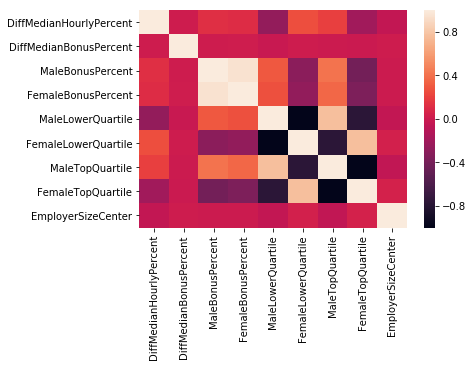

In [25]:
#Check for collinear variables

corr_matrix = gap_all.corr()
sns.heatmap(corr_matrix)

We don't see any strong collinearirity among any of the potential predictors

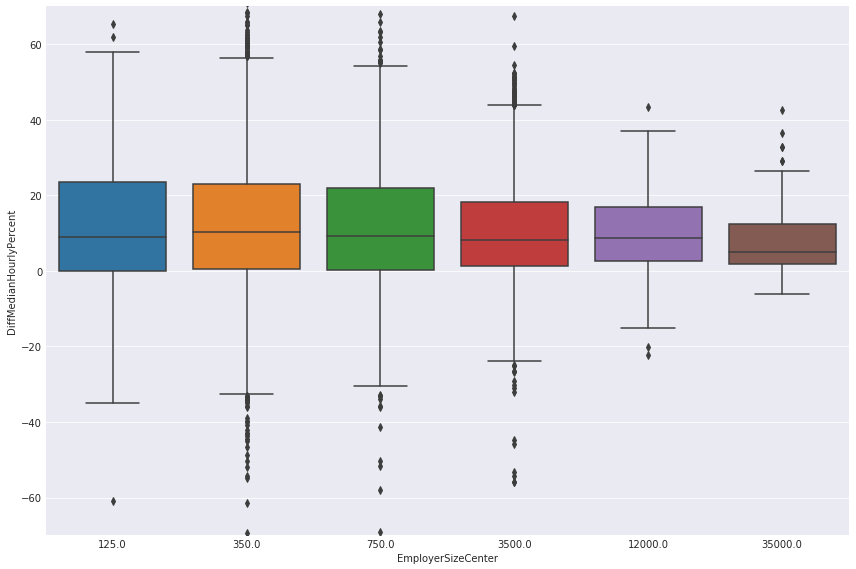

In [26]:
# Plot the DiffMedianHourlyPercent based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='DiffMedianHourlyPercent', x='EmployerSizeCenter',
                   data=gap_all, size=8, aspect=1.5, legend_out=False)
    ax.set(ylim=(-70, 70))

**Observation:** Looking only on employer size, we can conclude that the paygap in hourly payment favouring men, is smaller in larger companies.

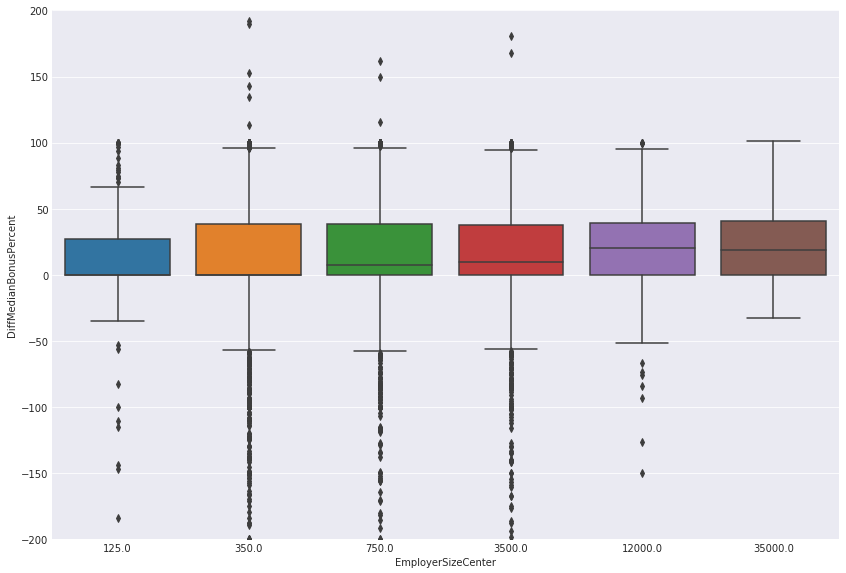

In [27]:
# Plot the DiffMedianBonusPercent based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='DiffMedianBonusPercent', x='EmployerSizeCenter',
                   data=gap_all, size=8, aspect=1.5, legend_out=False)
    ax.set(ylim=(-200, 200))

**Observation:** On the other hand, the bigger companies tend to have higher disrepancies in bonus payments. Larger companies tend to give higher bonuses to men compared to women.

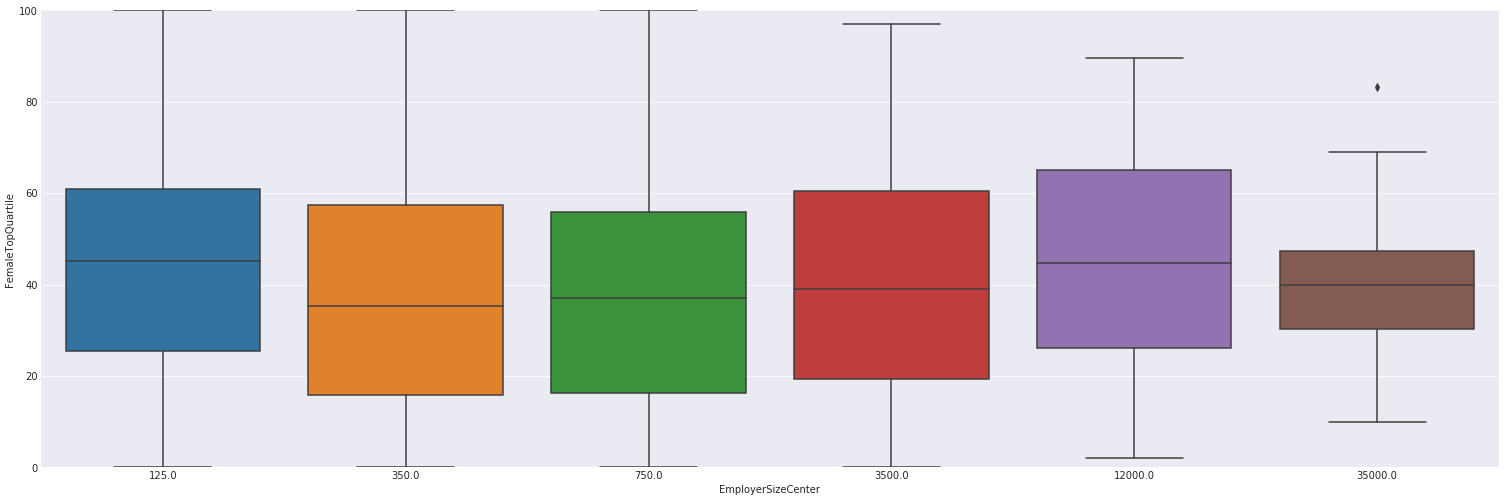

In [28]:
# Plot the FemaleTopQuartile based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='FemaleTopQuartile', x='EmployerSizeCenter',
                   data=gap_all, size=7, aspect=3, legend_out=False)
    ax.set(ylim=(-0, 100))

**Observation:** Looking only on employer size, we can see that women are underepresented in the top quartlier, across employers of all sizes. However, it doesn't look like that there is a clear trend across employer sizes.

In [29]:
# See https://en.wikipedia.org/wiki/Standard_Industrial_Classification

mappings = [
    (100, 999, 'Agriculture'),
    (1000, 1499, 'Mining'),
    (1500, 1799, 'Construction'),
    (1800, 1999, 'not used'),
    (2000, 3999, 'Manufacturing'),
    (4000, 4999, 'Utility Services'),
    (5000, 5199, 'Wholesale Trade'),
    (5200, 5999, 'Retail Trade'),
    (6000, 6920, 'Financials'),
    (7000, 9004, 'Services'),
    (9100, 9729, 'Public Administration'),
    (9800, 9999, 'Nonclassifiable'),
]

errors = set()
def to_code_range(i):
    if type(i) != str:
        return np.nan
    if i == "None Supplied":
        return np.nan
    code = int(i[0:4])
    for code_from, code_to, name in mappings:
        if code >= code_from and code <= code_to:
            return name
    #print("ERROR", code)
    errors.add(code)
    return np.nan

gap_all['SIC_SECTOR'] = gap_all['SICCode.SicText_1'].map(to_code_range)

errors

set()

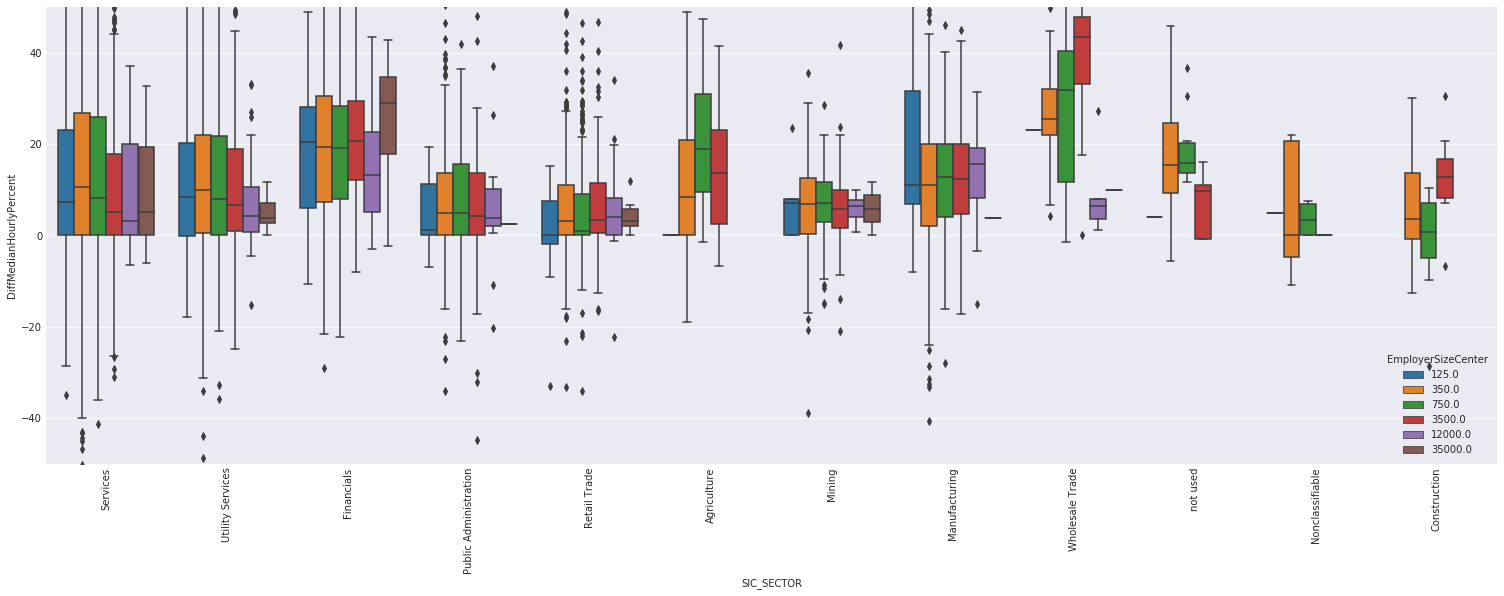

In [30]:
#create a factor plot for exploring whether the combination of size & industry affect the hourly paygap.

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='DiffMedianHourlyPercent', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, size=7, aspect=3, legend_out=False) 
    ax.set(ylim=(-50, 50))
    ax.set_xticklabels(rotation=90)

**Observation:** Based on our previous observations, we would expect that bigger companies have always lower paygap compared with the rest. However, there are industries where this doesn't hold true. Services and Financial industry are examples of that. Similarly, the utilities insustry seems to have low paygap for smaller size companies.

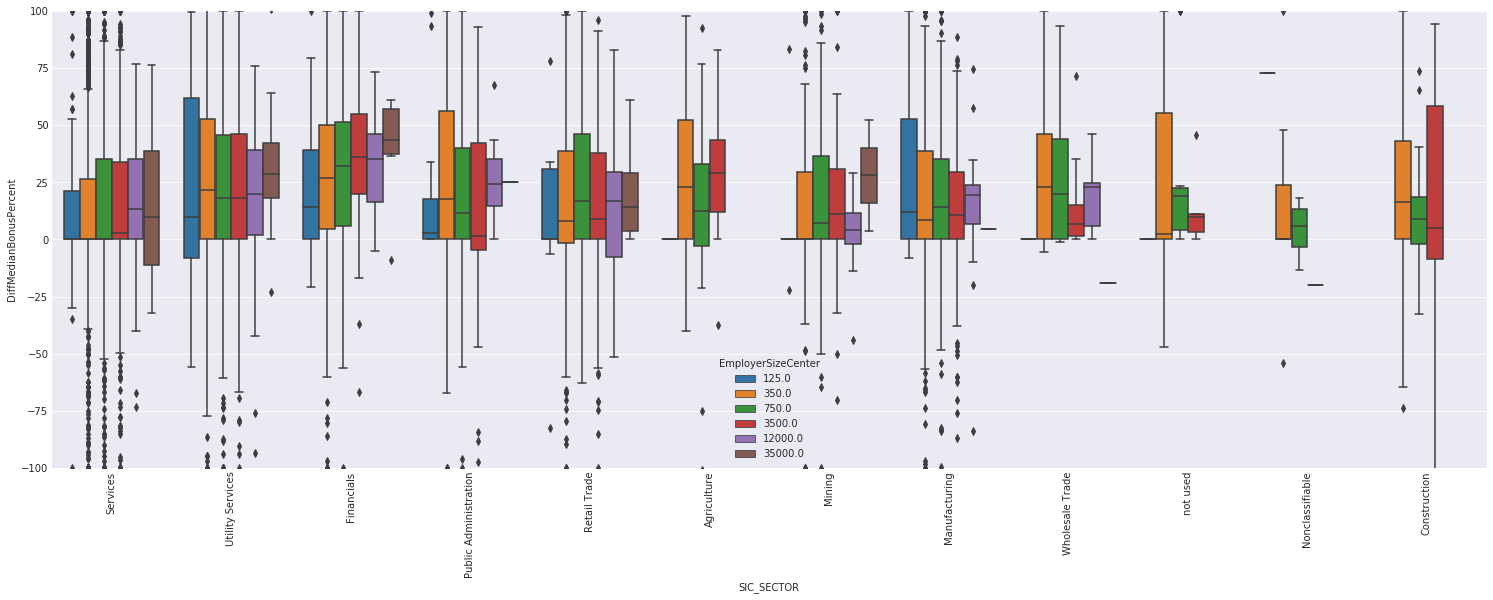

In [31]:
#create a factor plot for exploring whether the combination of size & industry affect the bonus payment.

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='DiffMedianBonusPercent', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, size=7, aspect=3, legend_out=False) 
    ax.set(ylim=(-100, 100))
    ax.set_xticklabels(rotation=90)

**Observation:** Across all industries the men get higher bonuses compared to women. Large financial companies seem to have the higherst paygap in bonus payment. 

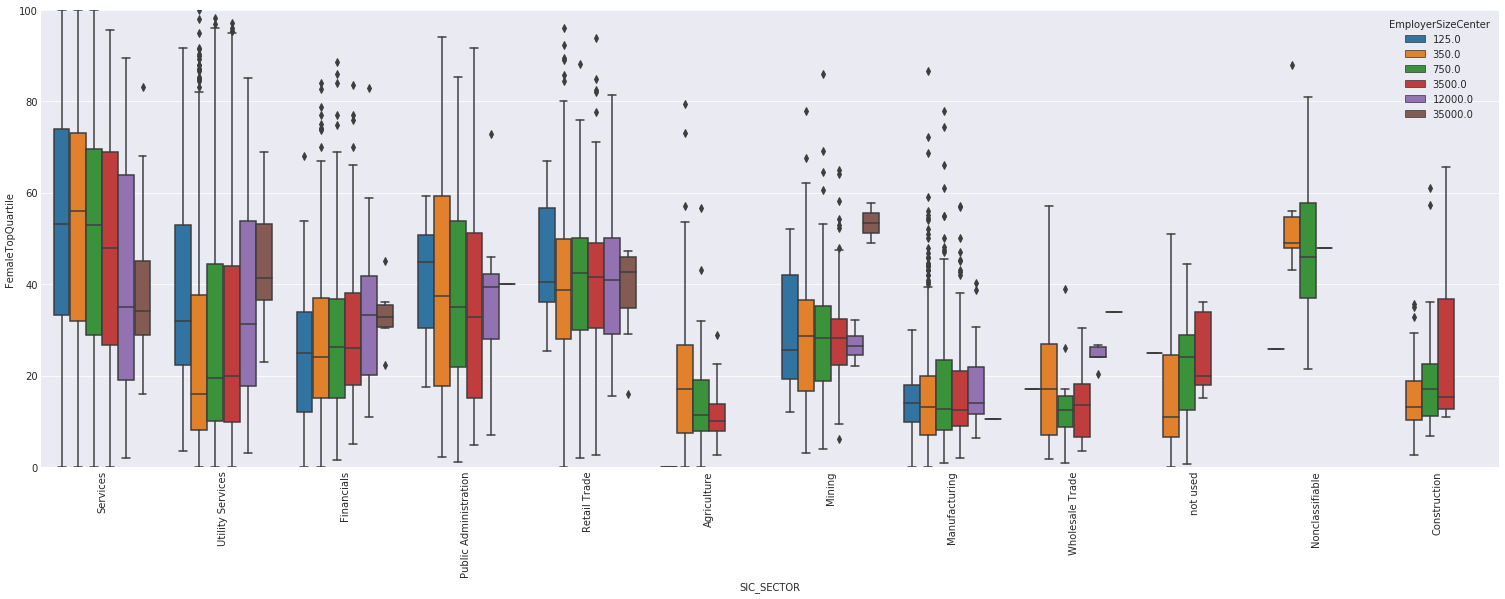

In [32]:
# Create a factor plot for exploring whether the combination of size & industry affect the female representation 
# in the top quartile.

with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='FemaleTopQuartile', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, size=7, aspect=3, legend_out=False) 
    ax.set(ylim=(0, 100))
    ax.set_xticklabels(rotation=90)

**Observation:** Based on our previous observations, it was expected that women will be underepresented in the top quartile across all industries.

We will build a model to predict the difference in hourly payment, based on the size and the industry of the company. We will examine linear regression & decision trees. 